In [1]:
import pylab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from sklearn.decomposition import PCA

In [13]:
cars_data = pd.read_csv("datasets/car_price_data.csv")

cars_data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
cars_data.drop(["car_ID", "symboling", "CarName", "aspiration",
                "carbody", "enginelocation", "enginetype", "fuelsystem",
                "cylindernumber"], axis = 1, inplace = True)

### Label encode the `doornumber` column

In [15]:
doornumber_dict = {'two':0, 'four':1}

cars_data['doornumber'].replace(doornumber_dict, inplace=True)

cars_data.head()

,fueltype,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,0,rwd,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,0,rwd,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,0,rwd,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,1,fwd,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,1,4wd,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### Label encode the `drivewheel` column

- The integers represent ordinal data so should be chosen accordingly
- Here the assumption is that 4-wheel drives have the highest price and rear-wheel drives have the lowest price

In [16]:
drivewheel_dict = {'rwd':0, 'fwd':1, "4wd" : 2}

cars_data['drivewheel'].replace(drivewheel_dict, inplace=True)

cars_data.head()

,fueltype,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,1,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### One-hot encode the `fueltype` column

In [17]:
cars_data = pd.get_dummies(cars_data, columns=['fueltype'])

cars_data.head()

,doornumber,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas
0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1
1,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1
2,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1
3,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1
4,1,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1


### Baseline model with all features and no PCA

In [18]:
x = cars_data.drop(["price"], axis = 1)

y = cars_data["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.25)

In [19]:
linear_model = LinearRegression(normalize = True).fit(x_train, y_train)

print("Training Score :", linear_model.score(x_train, y_train))

Training Score : 0.8511187363481242


In [20]:
y_pred = linear_model.predict(x_test)

print("Testing Score :", r2_score(y_test, y_pred))

Testing Score : 0.8406187432157155


In [21]:
features = list(x.columns)

features

['doornumber',
 'drivewheel',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'fueltype_diesel',
 'fueltype_gas']

In [22]:
len(features)

17

### Helper function to apply PCA to input features

In [23]:
def apply_pca(x, n):

    pca = PCA(n_components = n)
    
    x_new = pca.fit_transform(x)
    
    return pca, pd.DataFrame(x_new)

In [24]:
pca, _ = apply_pca(cars_data[features], len(features))

print("Explained Variance :", pca.explained_variance_ratio_)

Explained Variance : [6.38104426e-01 3.59775327e-01 1.56275972e-03 3.98159295e-04
 7.63023941e-05 4.82433352e-05 1.36827126e-05 1.10529127e-05
 5.73506052e-06 1.86840044e-06 1.58943535e-06 3.85305348e-07
 2.36630821e-07 1.60461947e-07 6.50379109e-08 5.65690249e-09
 3.60531941e-39]


In [25]:
sum(pca.explained_variance_ratio_)

0.9999999999999999

### Most of the variance is captured in the first two principal components

In [27]:
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.9978797536361046

Text(0.5, 0, 'cumulative variance')

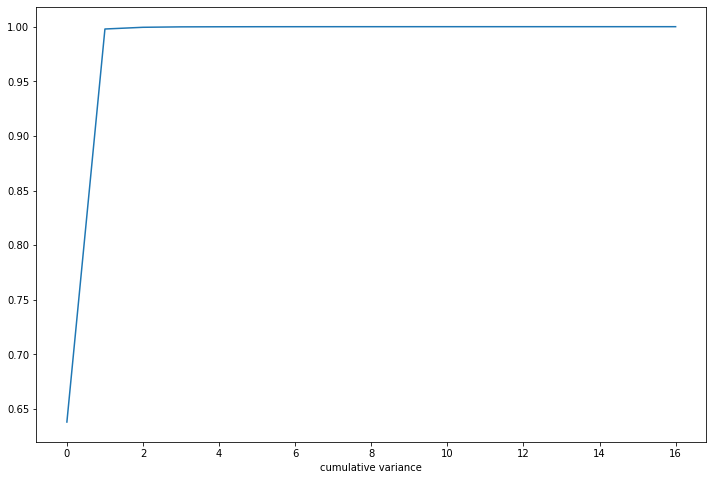

In [28]:
plt.figure(figsize = (12, 8))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel("n components")
plt.xlabel("cumulative variance")

### Helper function to build a model with specified number of principal components

In [39]:
def build_model(target, features, dataset, n_components):
    
    x = dataset[features]
    
    y = dataset[target]
    
    _, x_new = apply_pca(x, n_components)
    
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2)

    model = LinearRegression().fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    return {
            "x_initial" : x,
            "x_transform" : x_new,
            "x_train" : x_train,
            "x_test" : x_test,
            "y_train" : y_train,
            "y_test" : y_test,
            "y_pred" : y_pred,
            "model" : model
    }

In [40]:
model_params = {}

In [41]:
model_params["sklearn_reg"] = build_model("price", features, cars_data, 2)

In [42]:
model = model_params["sklearn_reg"]["model"]

x_initial = model_params["sklearn_reg"]["x_initial"]
x_transform = model_params["sklearn_reg"]["x_transform"]

x_train = model_params["sklearn_reg"]["x_train"]
x_test = model_params["sklearn_reg"]["x_test"]
y_train = model_params["sklearn_reg"]["y_train"]
y_test = model_params["sklearn_reg"]["y_test"]
y_pred = model_params["sklearn_reg"]["y_pred"]

In [43]:
x_transform.shape

(205, 2)

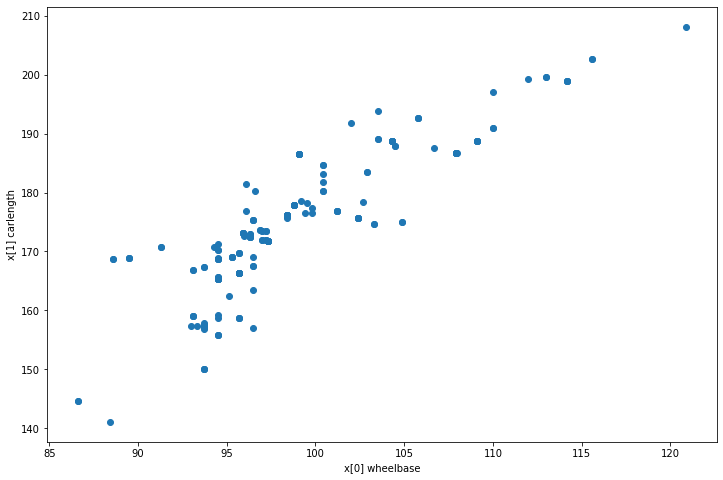

In [44]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.scatter(x_initial['wheelbase'], x_initial['carlength'], cmap = "Spectral")

plt.xlabel("x[0] wheelbase")
plt.ylabel("x[1] carlength")

plt.show()

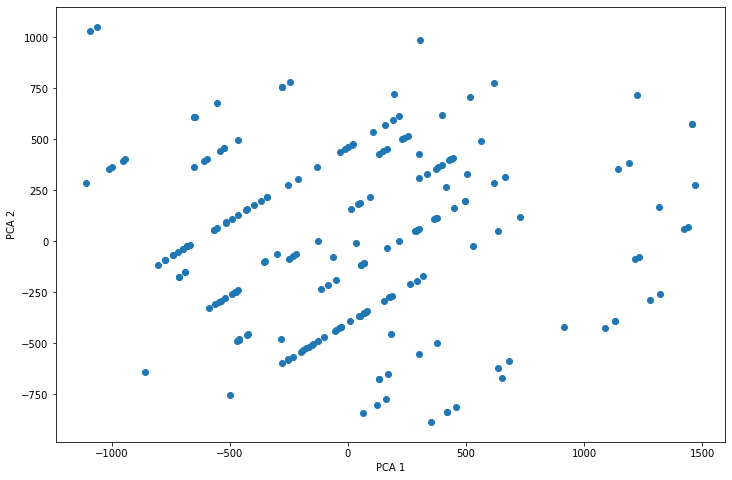

In [45]:
fig, ax = plt.subplots(figsize = (12, 8))

ax.scatter(x_transform[0], x_transform[1], cmap = "Spectral")

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.show()

In [46]:
print("Training Score :", model.score(x_train, y_train))

print("Testing Score :", r2_score(y_test, y_pred))

Training Score : 0.6830230938924169
Testing Score : 0.8063786720784085


In [47]:
model_params["sklearn_reg_3_components"] = build_model("price", features, cars_data, 3)

In [48]:
model = model_params["sklearn_reg_3_components"]["model"]

x_initial = model_params["sklearn_reg_3_components"]["x_initial"]
x_transform = model_params["sklearn_reg_3_components"]["x_transform"]

x_train = model_params["sklearn_reg_3_components"]["x_train"]
x_test = model_params["sklearn_reg_3_components"]["x_test"]
y_train = model_params["sklearn_reg_3_components"]["y_train"]
y_test = model_params["sklearn_reg_3_components"]["y_test"]

y_pred = model_params["sklearn_reg_3_components"]["y_pred"]

In [49]:
print("Training Score :", model.score(x_train, y_train))
print("Testing Score :", r2_score(y_test, y_pred))

Training Score : 0.8036384924138762
Testing Score : 0.8411868133367361


In [50]:
model_params["sklearn_reg_4_components"] = build_model("price", features, cars_data, 4)

In [51]:
model = model_params["sklearn_reg_4_components"]["model"]

x_initial = model_params["sklearn_reg_4_components"]["x_initial"]
x_transform = model_params["sklearn_reg_4_components"]["x_transform"]

x_train = model_params["sklearn_reg_4_components"]["x_train"]
x_test = model_params["sklearn_reg_4_components"]["x_test"]
y_train = model_params["sklearn_reg_4_components"]["y_train"]
y_test = model_params["sklearn_reg_4_components"]["y_test"]

y_pred = model_params["sklearn_reg_4_components"]["y_pred"]

In [52]:
print("Training Score :", model.score(x_train, y_train))
print("Testing Score :", r2_score(y_test, y_pred))

Training Score : 0.8200536211576833
Testing Score : 0.8178546834863254


In [53]:
model_params["sklearn_reg_6_components"] = build_model("price", features, cars_data, 6)

In [54]:
model = model_params["sklearn_reg_6_components"]["model"]

x_initial = model_params["sklearn_reg_6_components"]["x_initial"]
x_transform = model_params["sklearn_reg_6_components"]["x_transform"]

x_train = model_params["sklearn_reg_6_components"]["x_train"]
x_test = model_params["sklearn_reg_6_components"]["x_test"]
y_train = model_params["sklearn_reg_6_components"]["y_train"]
y_test = model_params["sklearn_reg_6_components"]["y_test"]

y_pred = model_params["sklearn_reg_6_components"]["y_pred"]

In [55]:
print("Training Score :", model.score(x_train, y_train))
print("Testing Score :", r2_score(y_test, y_pred))

Training Score : 0.8380670933147157
Testing Score : 0.749716443691443
